In [1]:
# importing all the necessary libraries to carry out data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create a pizza_df
pizza_df = pd.read_excel('/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx')
# display 1st 5 of the data
pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
# info of the data frame 
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [4]:
# identify the number of duplicated rows
pizza_df.duplicated().sum()

0

In [5]:
# describe the summary stats of pizza_df
# mean, min, max, quartiles, std deviation
summary_stats = pizza_df.describe()
print(summary_stats)

       order_details_id      order_id      quantity  \
count      48620.000000  48620.000000  48620.000000   
mean       24310.500000  10701.479761      1.019622   
min            1.000000      1.000000      1.000000   
25%        12155.750000   5337.000000      1.000000   
50%        24310.500000  10682.500000      1.000000   
75%        36465.250000  16100.000000      1.000000   
max        48620.000000  21350.000000      4.000000   
std        14035.529381   6180.119770      0.143077   

                          order_date    unit_price   total_price  
count                          48620  48620.000000  48620.000000  
mean   2015-06-29 11:03:43.611682560     16.494132     16.821474  
min              2015-01-01 00:00:00      9.750000      9.750000  
25%              2015-03-31 00:00:00     12.750000     12.750000  
50%              2015-06-28 00:00:00     16.500000     16.500000  
75%              2015-09-28 00:00:00     20.250000     20.500000  
max              2015-12-31 00:00:0

***Total Revenue of Pizza Sales***

In [6]:
total_revenue = (pizza_df['total_price']).sum()
print("Total Revenue: $", total_revenue)

Total Revenue: $ 817860.05


***Average Order Value***

In [7]:
average_order_value = pizza_df.groupby("order_id")['total_price'].sum().mean()
# round to 2 dp
AOV = round(average_order_value, 2)
print("Average Order Value: $",AOV)

Average Order Value: $ 38.31


***Total Pizza Sold***

In [8]:
total_pizza_sold = pizza_df['quantity'].sum()
print("Total Pizzas Sold: ", total_pizza_sold)

Total Pizzas Sold:  49574


In [9]:
total_orders = len(pizza_df.groupby('order_id').count())
print("Total Orders:", total_orders)

Total Orders: 21350


***Average Pizzas Per Order***

In [10]:
avg_pizzas_per_order = pizza_df['quantity'].sum() / total_orders
AOP = round(avg_pizzas_per_order, 2)
print("Average Pizzas per Order:", AOP)

Average Pizzas per Order: 2.32


In [11]:
category_analysis = pizza_df.groupby('pizza_category').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_category=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).sort_values(by='revenue_per_category', ascending=False)
print("Average Unit Price and Revenue by Category:\n", category_analysis)

Average Unit Price and Revenue by Category:
                 average_unit_price  revenue_per_category
pizza_category                                          
Classic                  14.797490             220053.10
Supreme                  17.363229             208197.00
Chicken                  17.709408             195919.50
Veggie                   16.612639             193690.45


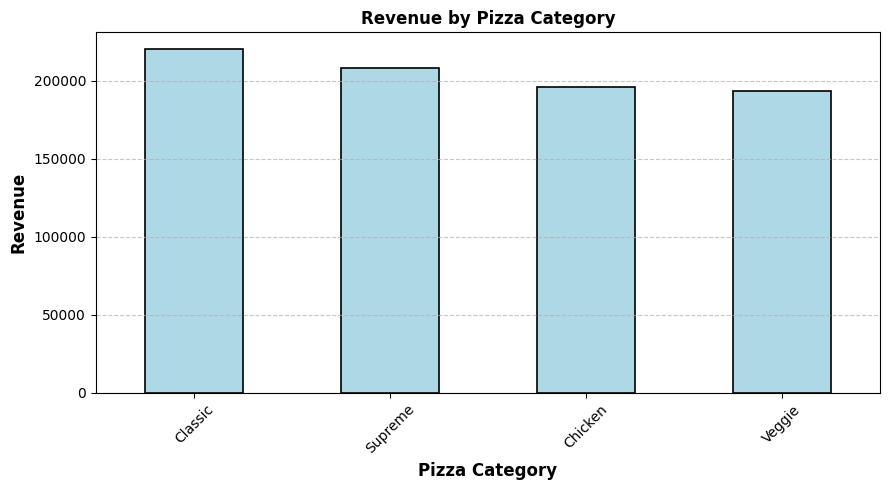

In [12]:
# Revenue by Pizza Category by a Bar Chart
plt.figure(figsize=(9, 5))
category_analysis['revenue_per_category'].plot(kind="bar", color="lightblue", edgecolor="black", linewidth=1.2)
plt.xlabel("Pizza Category", fontsize=12, fontweight='bold')
plt.ylabel("Revenue", fontsize=12, fontweight='bold')
plt.title("Revenue by Pizza Category",fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
import plotly.express as px
# Now create an interactive bar chart using Plotly
fig = px.bar(
    category_analysis,
    x=category_analysis.index,  # The pizza categories
    y='revenue_per_category',   # The revenue per category
    labels={
        'x': 'Pizza Category', 
        'revenue_per_category': 'Revenue'
    },
    title='Revenue by Pizza Category',
    text='revenue_per_category'  # Display the revenue values on hover
)

# Customize the layout for better appearance
fig.update_layout(
    xaxis_title="Pizza Category",
    yaxis_title="Revenue",
    title_x=0.5,  # Center the title
    template='plotly_white',  # Use a clean theme
    bargap=0.2,  # Space between bars
    title_font=dict(size=20, color='black', family="Arial"),
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels for readability
)
# Automatically show the text inside the bars
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [14]:
# Average unit price by pizza size
size_analysis = pizza_df.groupby('pizza_size').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_size=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).sort_values(by='revenue_per_size', ascending=False)
print("Average Unit Price and Revenue by Size:\n", category_analysis)

Average Unit Price and Revenue by Size:
                 average_unit_price  revenue_per_category
pizza_category                                          
Classic                  14.797490             220053.10
Supreme                  17.363229             208197.00
Chicken                  17.709408             195919.50
Veggie                   16.612639             193690.45


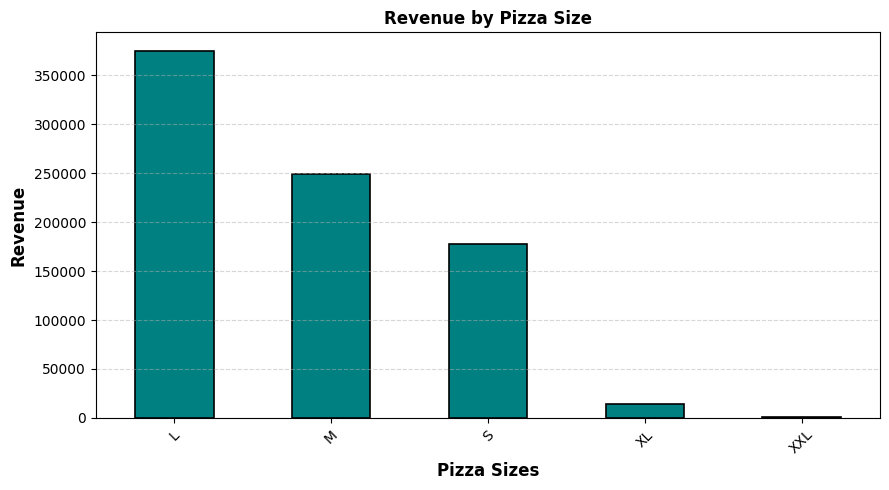

In [15]:
# Revenue by pizza size
plt.figure(figsize=(9, 5))
size_analysis['revenue_per_size'].plot(kind='bar', color='teal', edgecolor="black", linewidth=1.2)
plt.xlabel('Pizza Sizes', fontsize=12, fontweight='bold')
plt.ylabel('Revenue', fontsize=12, fontweight='bold')
plt.title('Revenue by Pizza Size', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [16]:
# types of pizza that were sold in the restaurant
pizza_df.pizza_name.value_counts()

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [17]:
# ingredients that were used
pizza_df.pizza_ingredients.value_counts()

pizza_ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola P

In [18]:
# average unit price & revenue of the top pizza
top_pizza_analysis = pizza_df.groupby("pizza_name").agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_pizza=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).nlargest(5, "revenue_per_pizza")
print("Average Unit Price & Revenue of Top 5 Pizzas:\n", top_pizza_analysis)

Average Unit Price & Revenue of Top 5 Pizzas:
                               average_unit_price  revenue_per_pizza
pizza_name                                                         
The Thai Chicken Pizza                 18.286069           43434.25
The Barbecue Chicken Pizza             17.572934           42768.00
The California Chicken Pizza           17.448523           41409.50
The Classic Deluxe Pizza               15.575952           38180.50
The Spicy Italian Pizza                18.104663           34831.25


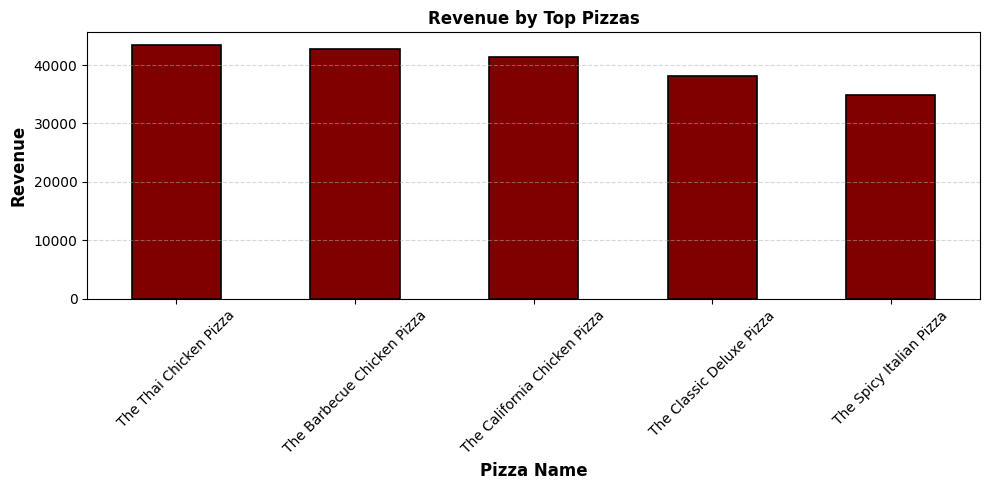

In [19]:
# Revenue by pizza size
plt.figure(figsize=(10, 5))
top_pizza_analysis['revenue_per_pizza'].plot(kind='bar', color='maroon', edgecolor="black", linewidth=1.2)
plt.xlabel('Pizza Name', fontsize=12, fontweight='bold')
plt.ylabel('Revenue', fontsize=12, fontweight='bold')
plt.title('Revenue by Top Pizzas', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
#which day of week has highest num of orders 
pizza_df['day_of_week'] = pd.to_datetime(pizza_df['order_date']).dt.strftime('%A')
day_of_week_analysis = pizza_df.groupby('day_of_week')['order_id'].count().sort_values(ascending=False)
print("Highest Number of Orders by Day of Week:\n", day_of_week_analysis)

Highest Number of Orders by Day of Week:
 day_of_week
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_id, dtype: int64


In [21]:
# year in which the orders were made
pizza_df['order_year'] =pd.DatetimeIndex( pizza_df['order_date']).year
pizza_df['order_year'].value_counts()

order_year
2015    48620
Name: count, dtype: int64

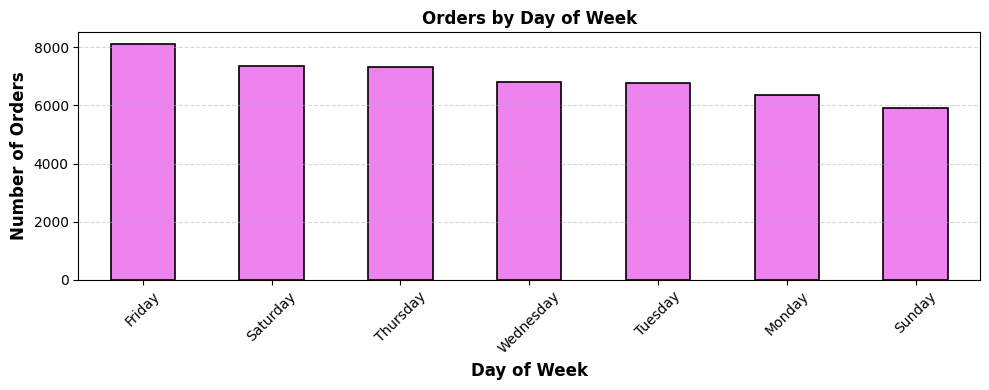

In [22]:
plt.figure(figsize=(10, 4))
day_of_week_analysis.plot(kind='bar', color='violet', edgecolor="black", linewidth=1.2)
plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
plt.ylabel('Number of Orders',fontsize=12, fontweight='bold')
plt.title('Orders by Day of Week',fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [23]:
import plotly.express as px
fig = px.pie(
    day_of_week_analysis,
    names=day_of_week_analysis.index,  # The days of the week
    values=day_of_week_analysis,       # The number of orders
    title="Orders by Day of Week"
)

# Customize the layout for better appearance
fig.update_traces(
    textinfo='label+percent+value',  # Show label, percentage, and value on hover
    hoverinfo='label+percent+value', # Ensure all details are visible on hover
    textfont_size=14                 # Font size of the text inside the pie
)

fig.update_layout(
    title_font=dict(size=20, color='black', family="Arial"),
    title_x=0.5,  # Center the title
    template='plotly_white',  # Use a clean theme
)

# Show the interactive pie chart
fig.show()

In [24]:
# what time does the order occur the most
# display the time when pizzas are ordered the most along w/ humber of orders
pizza_df['delivery_time'] = pizza_df['order_time'].astype('string').str.slice(0, 5) 
delivery_time_analysis = pizza_df.groupby('delivery_time')['order_id'].count().nlargest(5)
print("Most Occurring Order Times:\n", delivery_time_analysis)

Most Occurring Order Times:
 delivery_time
13:04    198
12:39    158
12:56    155
12:30    153
12:29    149
Name: order_id, dtype: int64


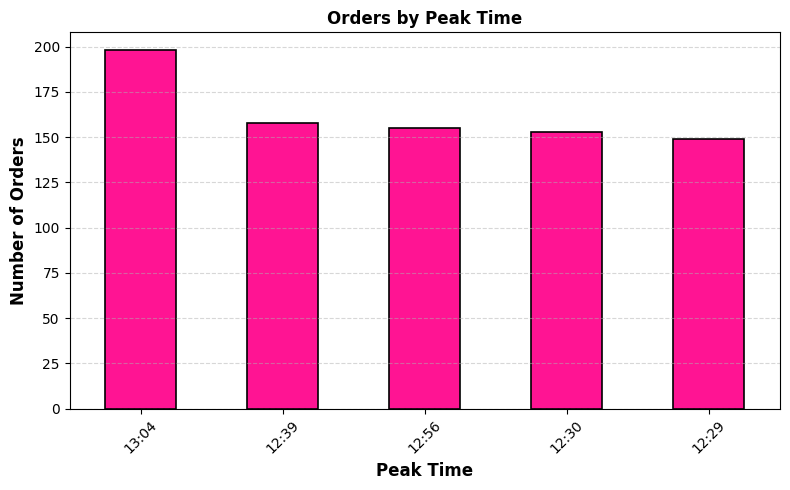

In [25]:
# Orders by Peak time (bar chart)
plt.figure(figsize=(8, 5))
delivery_time_analysis.plot(kind='bar', color='deeppink', edgecolor="black", linewidth=1.2)
plt.xlabel('Peak Time', fontsize=12, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=12, fontweight='bold')
plt.title('Orders by Peak Time', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
# which month has the highest revenue ?
month_revenue_analysis = pizza_df.groupby(pd.to_datetime(pizza_df['order_date']).dt.strftime('%B'))['total_price'].sum().sort_values(ascending=False)
print("Highest Revenue Months:\n", month_revenue_analysis)

Highest Revenue Months:
 order_date
July         72557.90
May          71402.75
March        70397.10
November     70395.35
January      69793.30
April        68736.80
August       68278.25
June         68230.20
February     65159.60
December     64701.15
September    64180.05
October      64027.60
Name: total_price, dtype: float64


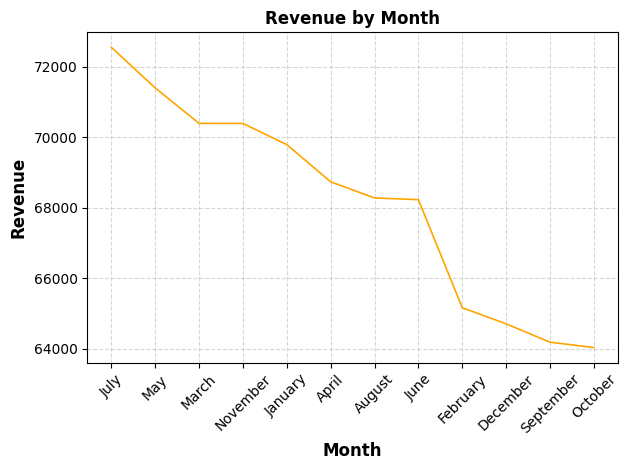

In [27]:
month_revenue_analysis.plot(kind='line', color='orange',linewidth=1.2)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Revenue', fontsize=12, fontweight='bold')
plt.title('Revenue by Month', fontsize=12, fontweight='bold')
plt.xticks(ticks=range(len(month_revenue_analysis.index)), 
           labels=month_revenue_analysis.index, 
           rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [28]:
# most ordered pizza
most_ordered_pizza = pizza_df.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(3, 'order_count')
print("Most Ordered Pizzas:\n", most_ordered_pizza)

Most Ordered Pizzas:
                             order_count  average_unit_price
pizza_name                                                 
The Classic Deluxe Pizza           2416           15.575952
The Barbecue Chicken Pizza         2372           17.572934
The Hawaiian Pizza                 2370           13.317194


In [29]:
# least ordered pizza by the customers
least_ordered_pizza = pizza_df.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nsmallest(3, 'order_count')
print("Most Ordered Pizzas:\n", least_ordered_pizza)

Most Ordered Pizzas:
                          order_count  average_unit_price
pizza_name                                              
The Brie Carre Pizza             480           23.650000
The Mediterranean Pizza          923           16.427952
The Calabrese Pizza              927           17.005124


In [30]:
# pizza size that is preferred by the customers?
preferred_pizza_size = pizza_df.groupby('pizza_size').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Size:\n", preferred_pizza_size)

Preferred Pizza Size:
             order_count  average_unit_price
pizza_size                                 
L                 18526           19.802553


In [31]:
# pizza category that is most preferred by the customers
preferred_pizza_category = pizza_df.groupby('pizza_category').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Category:\n", preferred_pizza_category)

Preferred Pizza Category:
                 order_count  average_unit_price
pizza_category                                 
Classic               14579            14.79749


In [32]:
# cheapest pizza
cheapest_pizza = pizza_df[['pizza_name', 'unit_price']].sort_values(by='unit_price').iloc[0]
print("Lowest Priced Pizza:\n", cheapest_pizza)

Lowest Priced Pizza:
 pizza_name    The Pepperoni Pizza
unit_price                   9.75
Name: 7636, dtype: object


In [33]:
# expensive pizza
most_exp_pizza = pizza_df[['pizza_name', 'unit_price']].sort_values(by='unit_price', ascending=False).iloc[0]
print("Lowest Priced Pizza:\n", most_exp_pizza)

Lowest Priced Pizza:
 pizza_name    The Greek Pizza
unit_price              35.95
Name: 22903, dtype: object


In [34]:
# pizza per cat
pizzas_per_category = pizza_df['pizza_category'].value_counts()
print("Number of Pizzas per Category:\n", pizzas_per_category)

Number of Pizzas per Category:
 pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64


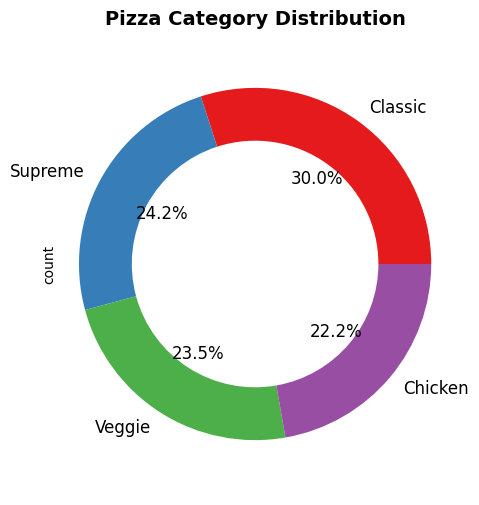

In [35]:
import matplotlib.cm as cm
color_map = plt.get_cmap('Set1')

# Plotting the pizza category distribution as a pie chart
plt.figure(figsize=(5, 6))  # Set figure size for better visibility

pizzas_per_category.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages on the pie chart
    colors=color_map(range(len(pizzas_per_category))),  # Apply the color map
    wedgeprops=dict(width=0.3),  # Add some space between slices (optional)
    textprops={'fontsize': 12}  # Set font size of the text
)

# Adding a title and ensuring the pie chart is a circle
plt.title('Pizza Category Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the pie chart
plt.show()


In [36]:
# num of pizza per size
pizzas_per_size = pizza_df['pizza_size'].value_counts()
print("Number of Pizzas per Size:\n", pizzas_per_size)

Number of Pizzas per Size:
 pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64


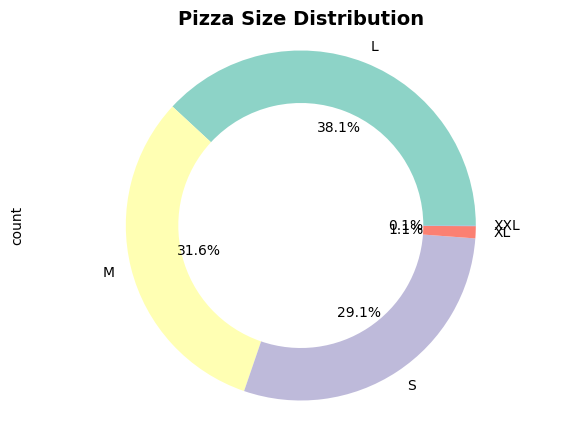

In [37]:
color_map = plt.get_cmap('Set3') 

# Plotting the pizza size distribution as a pie chart
plt.figure(figsize=(7, 5))  # Set figure size for better visibility

pizzas_per_size.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages on the pie chart
    colors=color_map(range(len(pizzas_per_size))),  # Apply the color map
    wedgeprops=dict(width=0.3),  # Optional: add some space between slices
    textprops={'fontsize': 10}  # Set font size of the text
)

plt.title('Pizza Size Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

plt.show()